In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES

In [2]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [3]:
df.index.freq='MS'

In [4]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [6]:
train_data = df.iloc[:108]
test_data=df.iloc[108:]

In [7]:
fitted_model=ES(train_data['Thousands of Passengers']
                , trend='mul' 
                , seasonal='mul'
                , seasonal_periods=12
               ).fit()

c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\users\tsar\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [8]:
test_predictions=fitted_model.forecast(36);

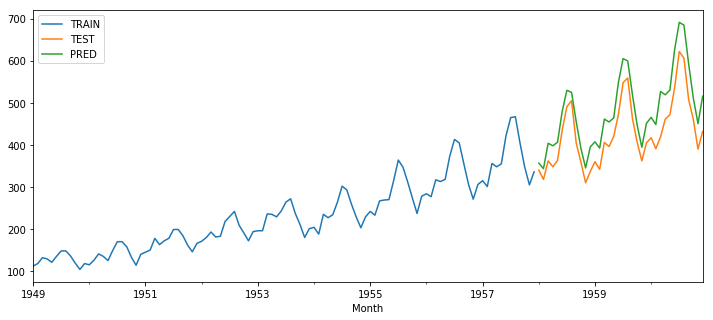

In [9]:
train_data["Thousands of Passengers"].plot(legend=True, label="TRAIN", figsize=(12,5))
test_data["Thousands of Passengers"].plot(legend=True, label="TEST")
test_predictions.plot(legend=True, label="PRED", figsize=(12,5))


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
mean_absolute_error(test_data, test_predictions)

53.16361991340851

In [21]:
mean_squared_error(test_data, test_predictions)

3200.583445912333

In [22]:
np.sqrt(mean_squared_error(test_data, test_predictions))

56.57369924189449

### Environment:
* Windows 10
* numpy: 1.16.2
* sklearn: 0.0
* statsmodels 0.11.1
* Python: 3.7.2

In [17]:
df.describe()

,Thousands of Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [18]:
np.sqrt(mean_squared_error(test_data, test_predictions))/df.mean()

Thousands of Passengers    0.201834
dtype: float64